### Import Libraries

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

### Download required data

In [11]:
# Download required NLTK data
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('vader_lexicon')


### Customize data

In [12]:
#customise your application 

#name of the file where you have feedback data in CSV format
myfile='0501 feedback.csv'

#name of the file to save sentiment score  in CSV format
my_feedback='0501 feedback_with_sentiment.csv'

# name of the column where feedback is stored
feedback_column='text_column'


### Load and preprocess data

In [13]:
# Load data
data = pd.read_csv(myfile)

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_text)

data['cleaned_text'] = data[feedback_column].apply(preprocess_text)

### Sentiment analysis using VADER and TextBlob

In [14]:
# VADER sentiment analysis
sia = SentimentIntensityAnalyzer()
data['vader_sentiment'] = data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# TextBlob sentiment analysis
data['textblob_sentiment'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

### Identify negative feedback 

In [15]:
# Identify negative feedback
negative_feedback = data[data['vader_sentiment'] < -0.5]
print(negative_feedback[['text_column', 'vader_sentiment']])

                                         text_column  vader_sentiment
1  The service was terrible and the staff were rude.          -0.7269
8                           Terrible, just terrible.          -0.7351


### Plot VADER sentiment score 

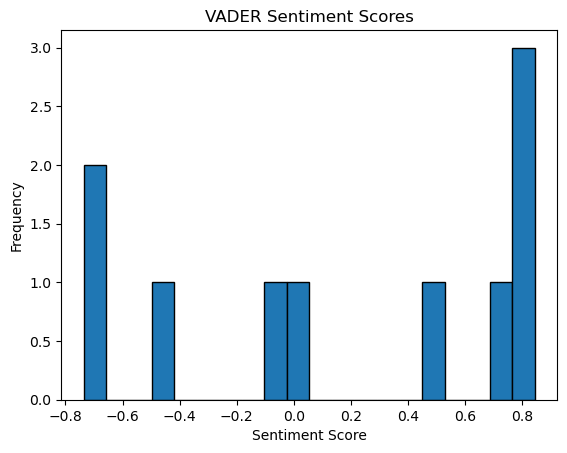

In [16]:
# Plot VADER sentiment scores
plt.hist(data['vader_sentiment'], bins=20, edgecolor='black')
plt.title('VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Plot TextBlob sentiment score 

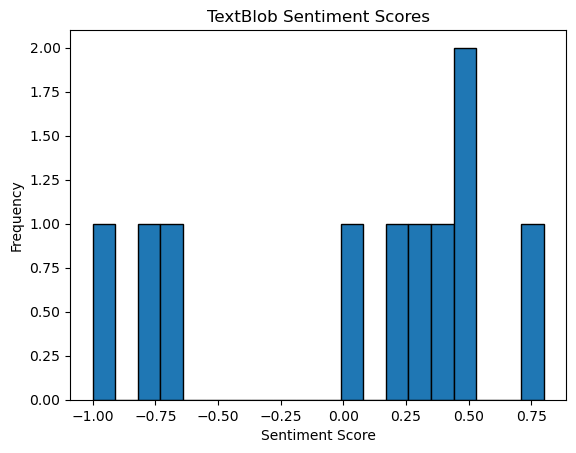

In [17]:
# Plot TextBlob sentiment scores
plt.hist(data['textblob_sentiment'], bins=20, edgecolor='black')
plt.title('TextBlob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Save results in CSV file

In [18]:
# Save the text and sentiment scores to a new CSV file
output_data = data[['text_column', 'vader_sentiment', 'textblob_sentiment']]
output_data.to_csv(my_feedback, index=False)